In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from networkx.drawing.nx_agraph import graphviz_layout
import requests

In [27]:
ASS_TOKEN = '2RPzG2Lq4IGI898U_K7e2xhXRAjCn5pJzrktLq4RAM9alRf7TFgdXLC8FYvGJziIZytdps2tS8FDdBiVYljFCO7H2pL3iO7A3wa8mVkCBZa-gebx0ILe-hifgKrFDk0SsUVsg2kX3fZLnYNZijkbu1ElNxb5CiEt3dv97Jc2279OeWYJ6dA00poDtXH9DBBR'

In [2]:
ASS_TOKEN_1 = 'vk1.a.2RPzG2Lq4IGI898U_K7e2xhXRAjCn5pJzrktLq4RAM9alRf7TFgdXLC8FYvGJziIZytdps2tS8FDdBiVYljFCO7H2pL3iO7A3wa8mVkCBZa-gebx0ILe-hifgKrFDk0SsUVsg2kX3fZLnYNZijkbu1ElNxb5CiEt3dv97Jc2279OeWYJ6dA00poDtXH9DBBR'

Processing id:  count
{'error_code': 100, 'error_msg': 'One of the parameters specified was missing or invalid: user_id not integer', 'request_params': [{'key': 'user_id', 'value': 'count'}, {'key': 'count', 'value': '100'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'users.getFollowers'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  items
{'error_code': 100, 'error_msg': 'One of the parameters specified was missing or invalid: user_id not integer', 'request_params': [{'key': 'user_id', 'value': 'items'}, {'key': 'count', 'value': '100'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'users.getFollowers'}, {'key': 'oauth', 'value': '1'}]}


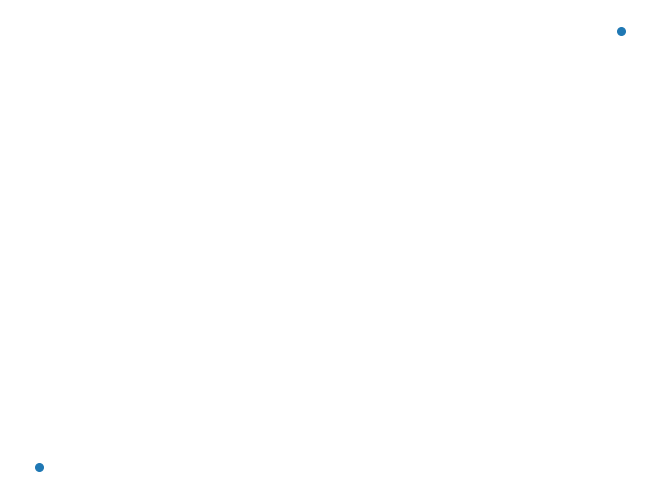

In [37]:
import requests
import networkx
import time
import collections


def get_friends_ids(user_id, access_token):
    friends_url = 'https://api.vk.com/method/users.getFollowers?user_id={}&count=100&access_token={}&v=5.131' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(user_id, access_token)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response[u'response']


graph = {}
friend_ids = get_friends_ids(1, access_token=ASS_TOKEN_1)  # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:
    print('Processing id: ', friend_id)
    graph[friend_id] = get_friends_ids(friend_id, access_token=ASS_TOKEN_1)

g = nx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

pos=nx.nx_agraph.graphviz_layout(g,prog="neato")
nx.draw(g, pos, node_size=30, with_labels=False, width=0.2)

In [38]:
friend_ids

{'count': 5803603,
 'items': [495068095,
  427570613,
  562441567,
  570847302,
  559802273,
  367796183,
  590433711,
  6377715,
  520538621,
  613698952,
  546551004,
  744601394,
  125083048,
  68121991,
  608214182,
  759527882,
  584448662,
  519036285,
  738882237,
  333667121,
  751635148,
  608225244,
  750892965,
  706205125,
  722976069,
  583395137,
  448709079,
  753242191,
  476195037,
  751624273,
  363141807,
  462501798,
  8524647,
  527092622,
  602389972,
  701010077,
  707636710,
  696424654,
  757392019,
  730487694,
  697274655,
  662203886,
  326153310,
  540055195,
  225339753,
  355312510,
  281253452,
  17448788,
  364503250,
  611789922,
  579070518,
  487814283,
  674535979,
  420835913,
  744332224,
  431885769,
  599933555,
  621329580,
  641119053,
  372520991,
  758166129,
  625128030,
  736178608,
  163353825,
  243180855,
  688315775,
  311369070,
  683848142,
  541169240,
  572382446,
  717604504,
  636947704,
  608534937,
  137301896,
  714849156,
  6

In [46]:
def get_followers(user_id, access_token, with_name=False):
    # fields = 'first_name,last_name' if with_name else ''
    # url = 'https://api.vk.com/method/friends.get?' + \
    #                     'user_id={}&fields={}&v=5.73'.format(user_id, fields)
    url = 'https://api.vk.com/method/users.getFollowers?' + \
                'user_id={}&count=1000&access_token={}&v=5.131'.format(user_id, access_token)
    response = requests.get(url).json()

    if response.get('error'):
        print(response.get('error'))
        return []
    return response.get('response').get('items')


In [4]:
def get_friends(user_id, access_token, with_name=False):
    # fields = 'first_name,last_name' if with_name else ''
    # url = 'https://api.vk.com/method/friends.get?' + \
    #                     'user_id={}&fields={}&v=5.73'.format(user_id, fields)
    url = 'https://api.vk.com/method/friends.get?' + \
                'user_id={}&count=100&access_token={}&v=5.131'.format(user_id, access_token)
    response = requests.get(url).json()
    if response.get('error'):
        print(response.get('error'))
        return []
    return response.get('response').get('items')

In [49]:
CENTRAL_USER_ID = 1
central_users = get_followers(CENTRAL_USER_ID, access_token=ASS_TOKEN_1, with_name=True)

# central_users[CENTRAL_USER_ID] = 'Я'

In [50]:
len(central_users)

1000

In [51]:
graph = {}

for user_id in central_users:
    graph[user_id] = get_friends(user_id, access_token=ASS_TOKEN_1)

{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '372265565'}, {'key': 'count', 'value': '100'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '206958431'}, {'key': 'count', 'value': '100'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '652791567'}, {'key': 'count', 'value': '100'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '500689765'}, {'key': 'count', 'value': '100'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': '

In [52]:
f_graph = {k: v for k, v in graph.items() if len(v) > 0}
f_central_users = [v for v in central_users if v in f_graph]

In [59]:
graph

{372265565: [],
 619678287: [14149981,
  35137939,
  43883715,
  47528976,
  53383835,
  70930681,
  152475632,
  158378134,
  158854418,
  163160397,
  170674602,
  174598812,
  184758355,
  193629865,
  196290489,
  197891930,
  198419065,
  203072885,
  207862574,
  230192963,
  283345889,
  313410576,
  360581997,
  369442176,
  378714731,
  383428094,
  383639643,
  406581186,
  413016469,
  449135717,
  457810491,
  460259968,
  462836045,
  464895345,
  477417210,
  477515660,
  482877970,
  484301461,
  491540001,
  508792924,
  509755643,
  509767939,
  514397449,
  514995750,
  521446215,
  521681111,
  522183498,
  523969923,
  537178048,
  539786503,
  546428077,
  547695450,
  549380810,
  555431754,
  556455773,
  558118198,
  559840618,
  569416908,
  575296123,
  576276265,
  577784595,
  579807985,
  583466123,
  583738495,
  588208026,
  589232935,
  589380891,
  591371261,
  593528020,
  597907877,
  604139017,
  605230085,
  607447232,
  610007832,
  611956618,
  61

In [55]:
g = nx.Graph()
for user_id, user_friends in f_graph.items():
    g.add_node(user_id)
    for friend_id in user_friends:
        if friend_id in f_central_users:
            g.add_edge(user_id, friend_id)

In [76]:
g = nx.Graph()
for user_id, user_friends in f_graph.items():
    g.add_node(user_id)
    for other_user_id, other_user_friends in f_graph.items():
        if user_id != other_user_id:
            common_friends = set(user_friends) & set(other_user_friends)
            if len(common_friends) > 0:
                g.add_edge(user_id, other_user_id)
    

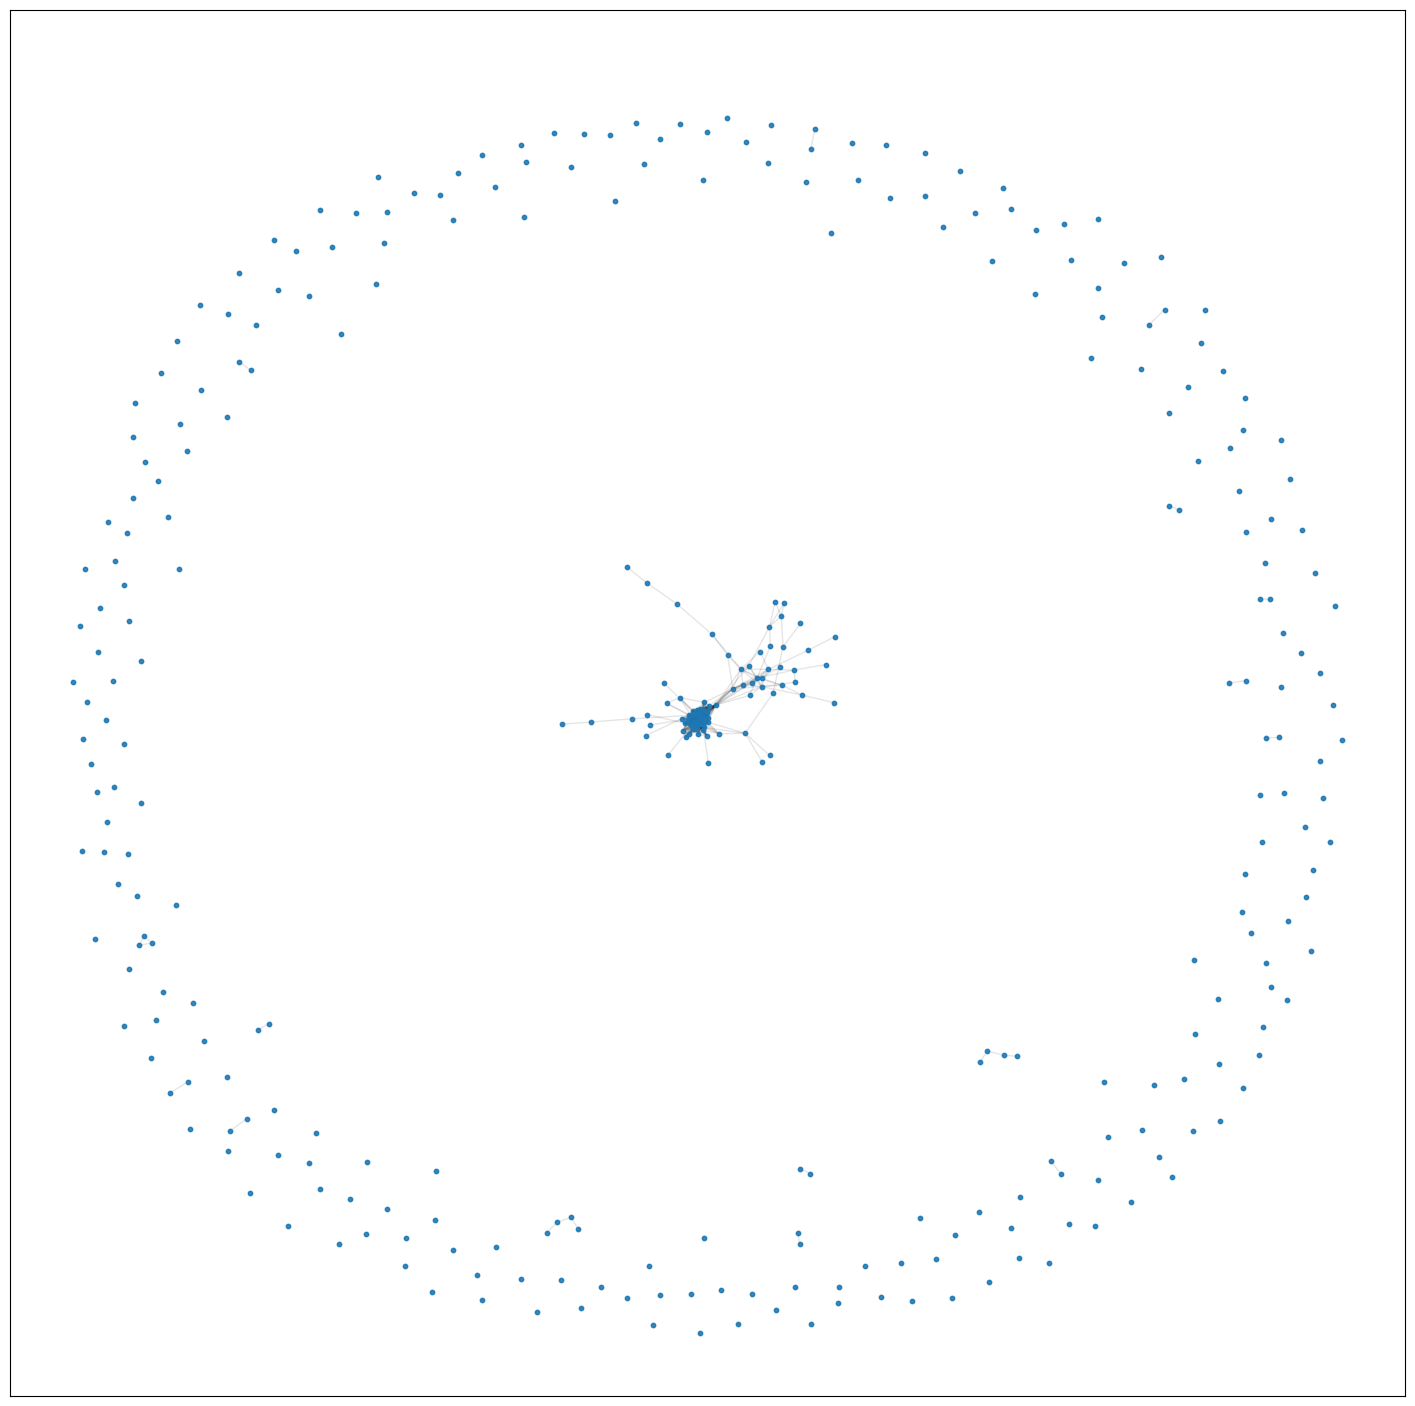

In [98]:
# draw_networkx_edges with size proportional to number of common friends
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(g)
nx.draw_networkx_edges(g, pos, width=1, alpha=0.1)

nx.draw_networkx_nodes(g, pos, node_size=10, alpha=0.9)


In [78]:
# visualize graph edges
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=3, size=0.1)

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'size'

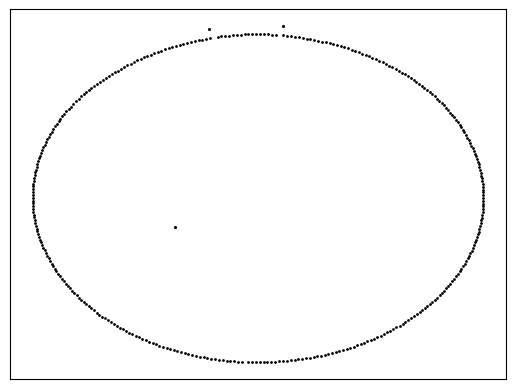

In [73]:
# visualisation of the graph with networkx
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=1, node_color='red', edgecolors='black')


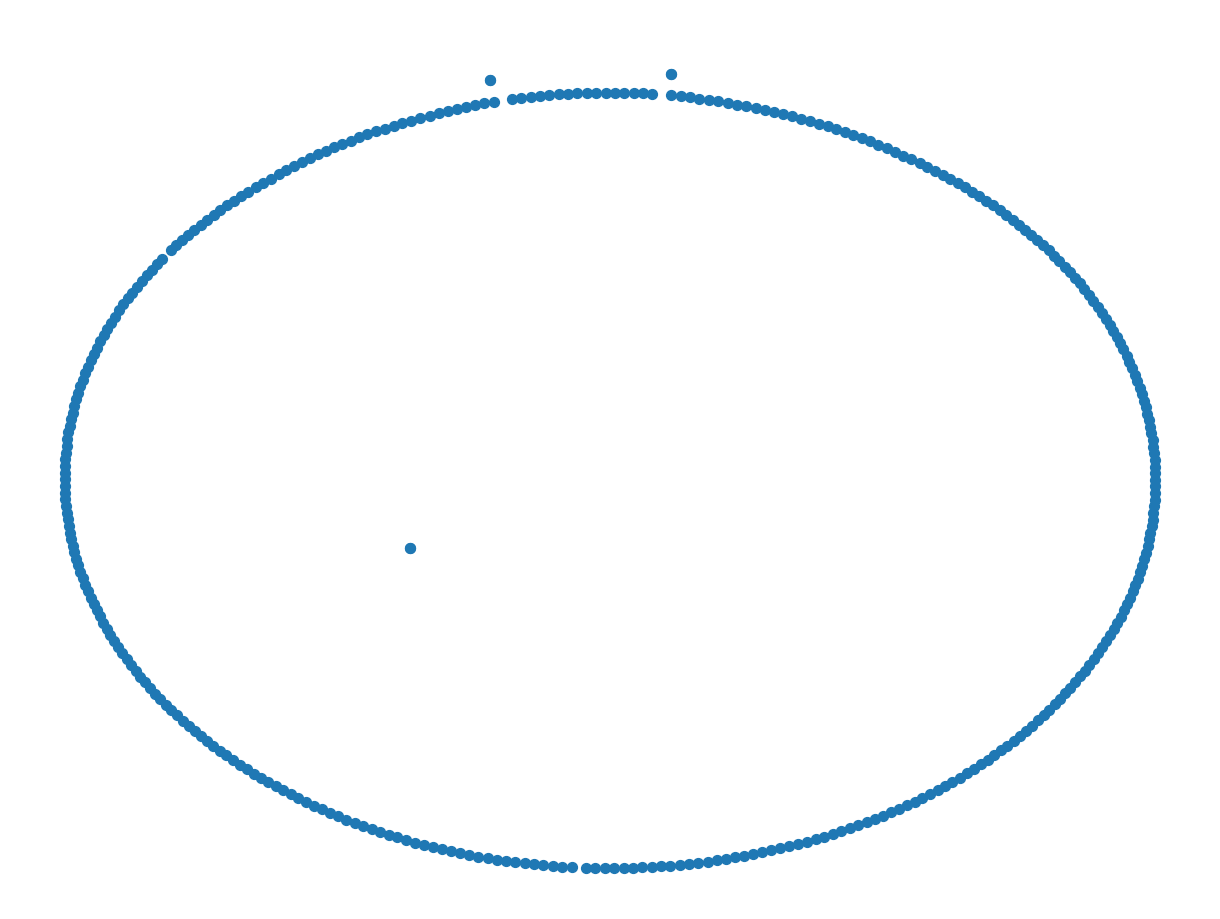

In [69]:
def graph_plot():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=False, node_size=50, width=0.5)
    plt.show()

graph_plot()